Lecture Example -- 3/19/2024

$$F = \dfrac{L}{K} (1 - exp(-K(t+a)))$$

Problem: Solve for $K$ assuming that $F, L, t$, and $a$ are given. 

Solution: Newton's Method
Solve for zeros of a function $f(x)$ using an iterative scheme: 
Guess $x_0$ $$x_{k+1} = x_{k} - \dfrac{f(x_k)}{f`(x_k)}$$

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def f(K):
    F = 1
    L = 1
    t = 1
    a = 1
    return L/K*(1-math.exp(-K*(t+a))) - F

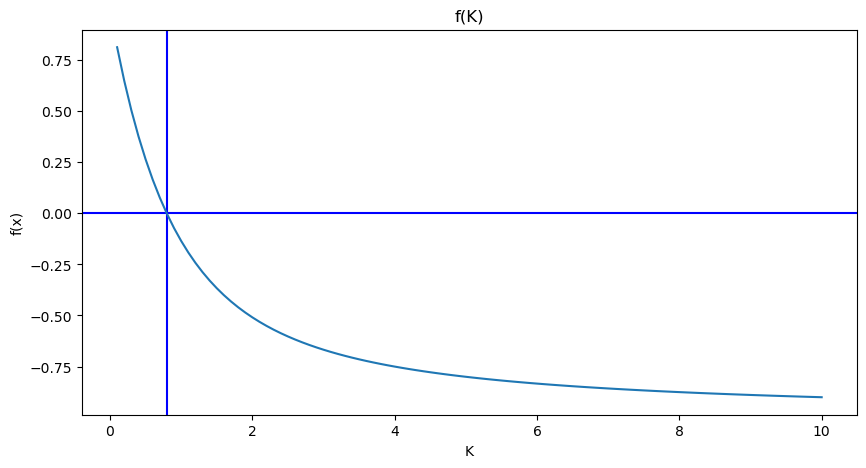

In [45]:
K_vals = np.linspace(0.1, 10, num=100)
plt.figure(figsize = (10, 5))
plt.axvline(x = 0.7968121300200202, color = 'b')
plt.axhline(y = 0, color = 'b')

y_vals = []
for i in range(len(K_vals)):
    y_vals.append(f(K_vals[i]))

plt.plot(x_vals, y_vals)
plt.title("f(K)")
plt.xlabel("K")
plt.ylabel("f(x)")
plt.show()

In [37]:
def newt(x_k):
    F = 1
    L = 1
    t = 1
    a = 1
    diff = L/x_k * ((t+a) * np.exp(-x_k * (t+a))) + (1 - np.exp(-x_k * (t+a))) * (-L / (x_k**2))
    f_k = f(x_k)
    return x_k - f_k/diff

In [48]:
Tol = 10**(-5) #stopping tolerance
x_0 = 5 #initial K value 

def Root(Tol, x_0):
    x_k = x_0
    x_k_1 = newt(x_0)

    interation = 0

    while np.abs(x_k_1 - x_k) > Tol: 
        interation += 1

        if interation == 1000000: 
            print("maximum number of iterations were done")
            break 

        x_k = x_k_1
        x_k_1 = newt(x_k_1)

    return x_k_1

In [49]:
Root(Tol, x_0)

0.7968121300200202